In [20]:
import pandas as pd
import numpy as np
#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None,names=['age','sex','cp','trestbps','chol','fbs','restecg','thalacg','exang','oldpeak','scope','ca','thal','num'])
data=pd.read_csv('/home/admin/Documents/HeartDisease/HeartDiseaseCleveland.csv',header=None,names=['age','sex','cp','trestbps','chol','fbs','restecg','thalacg','exang','oldpeak','scope','ca','thal','num'])
data.replace('?',-99999, inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalacg,exang,oldpeak,scope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [21]:
fc=['age','sex','cp','trestbps','chol','fbs','restecg','thalacg','exang','oldpeak','scope','ca','thal']
X=data[fc]
y=data.num

In [22]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [25]:
import matplotlib.pyplot as plt

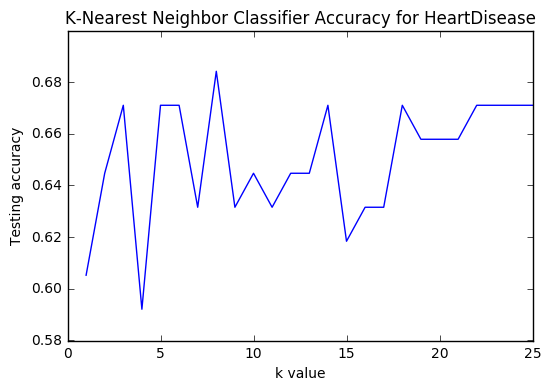

In [26]:
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('k value')
plt.ylabel('Testing accuracy')
plt.title('K-Nearest Neighbor Classifier Accuracy for HeartDisease')

In [27]:
print scores

[0.60526315789473684, 0.64473684210526316, 0.67105263157894735, 0.59210526315789469, 0.67105263157894735, 0.67105263157894735, 0.63157894736842102, 0.68421052631578949, 0.63157894736842102, 0.64473684210526316, 0.63157894736842102, 0.64473684210526316, 0.64473684210526316, 0.67105263157894735, 0.61842105263157898, 0.63157894736842102, 0.63157894736842102, 0.67105263157894735, 0.65789473684210531, 0.65789473684210531, 0.65789473684210531, 0.67105263157894735, 0.67105263157894735, 0.67105263157894735, 0.67105263157894735]


In [28]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [29]:
accuracy=knn.score(X_test,y_test)
print accuracy

0.684210526316


In [30]:
from sklearn import metrics

In [31]:
print (metrics.confusion_matrix(y_test,y_pred))

[[34  6]
 [18 18]]


In [32]:
knn.predict_proba(X_test)[0:10,:]

array([[ 0.875,  0.125],
       [ 0.5  ,  0.5  ],
       [ 0.25 ,  0.75 ],
       [ 0.25 ,  0.75 ],
       [ 0.75 ,  0.25 ],
       [ 0.25 ,  0.75 ],
       [ 0.125,  0.875],
       [ 0.875,  0.125],
       [ 0.125,  0.875],
       [ 0.625,  0.375]])

In [33]:
from sklearn.preprocessing import binarize

In [34]:
y_pred=binarize([y_pred],0.3)[0]

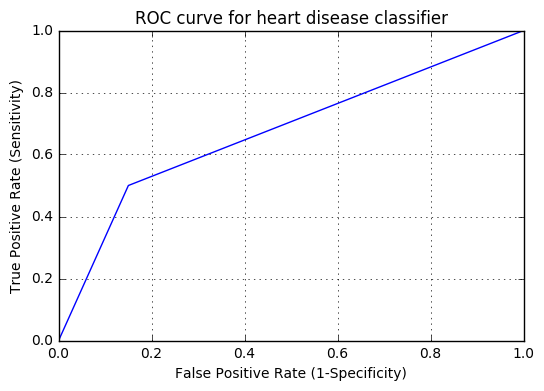

In [35]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [36]:
example_measures = np.array([57,0,2,130,236,0,2,174,0,0,2,1,3])
example_measures = example_measures.reshape(1, -1)
prediction = knn.predict(example_measures)
print(prediction)#0 means false, 1 means true
#predicts the value of the class attribute given the above values

[0]


In [40]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
accuracy=svm.score(X_train, y_train)
accuracy

1.0

In [38]:
prediction=svm.predict(example_measures)
print(prediction)

[1]


In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy=dt.score(X_train, y_train)
accuracy

1.0

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy=gnb.score(X_train, y_train)
accuracy

0.80616740088105732

In [43]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
accuracy=abc.score(X_train, y_train)
accuracy

0.92070484581497802

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy=rfc.score(X_train, y_train)
accuracy

0.99559471365638763